In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [3]:
feature_list = [fields_dict[1]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['DurationPickToPick']

In [4]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [5]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [6]:
train_df.head()

,DurationPickToPick_vCnt,DurationPickToPick_vFreq,DurationPickToPick_vMax,DurationPickToPick_vMin,DurationPickToPick_vStd,DurationPickToPick_vTrend,DurationPickToPick_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,2,0.198207,3.192,2.807,0.192500,0.385,2.999500
2,3,0.296778,3.230,3.106,0.051674,0.020,3.160667
3,3,0.298541,3.307,3.103,0.085391,0.031,3.191667
4,3,0.298554,3.242,3.153,0.038577,-0.036,3.188333


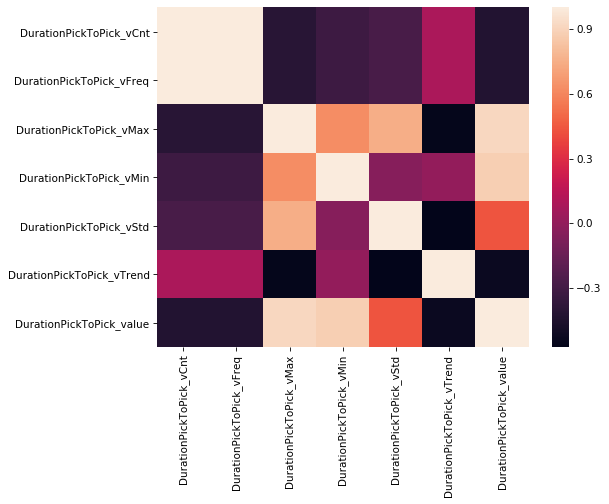

In [7]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

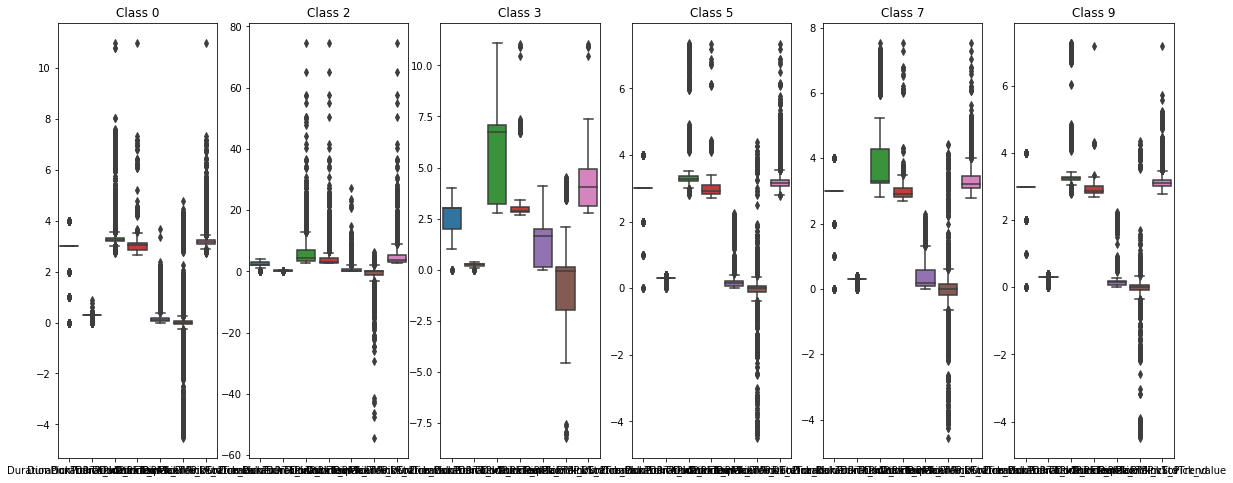

In [8]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


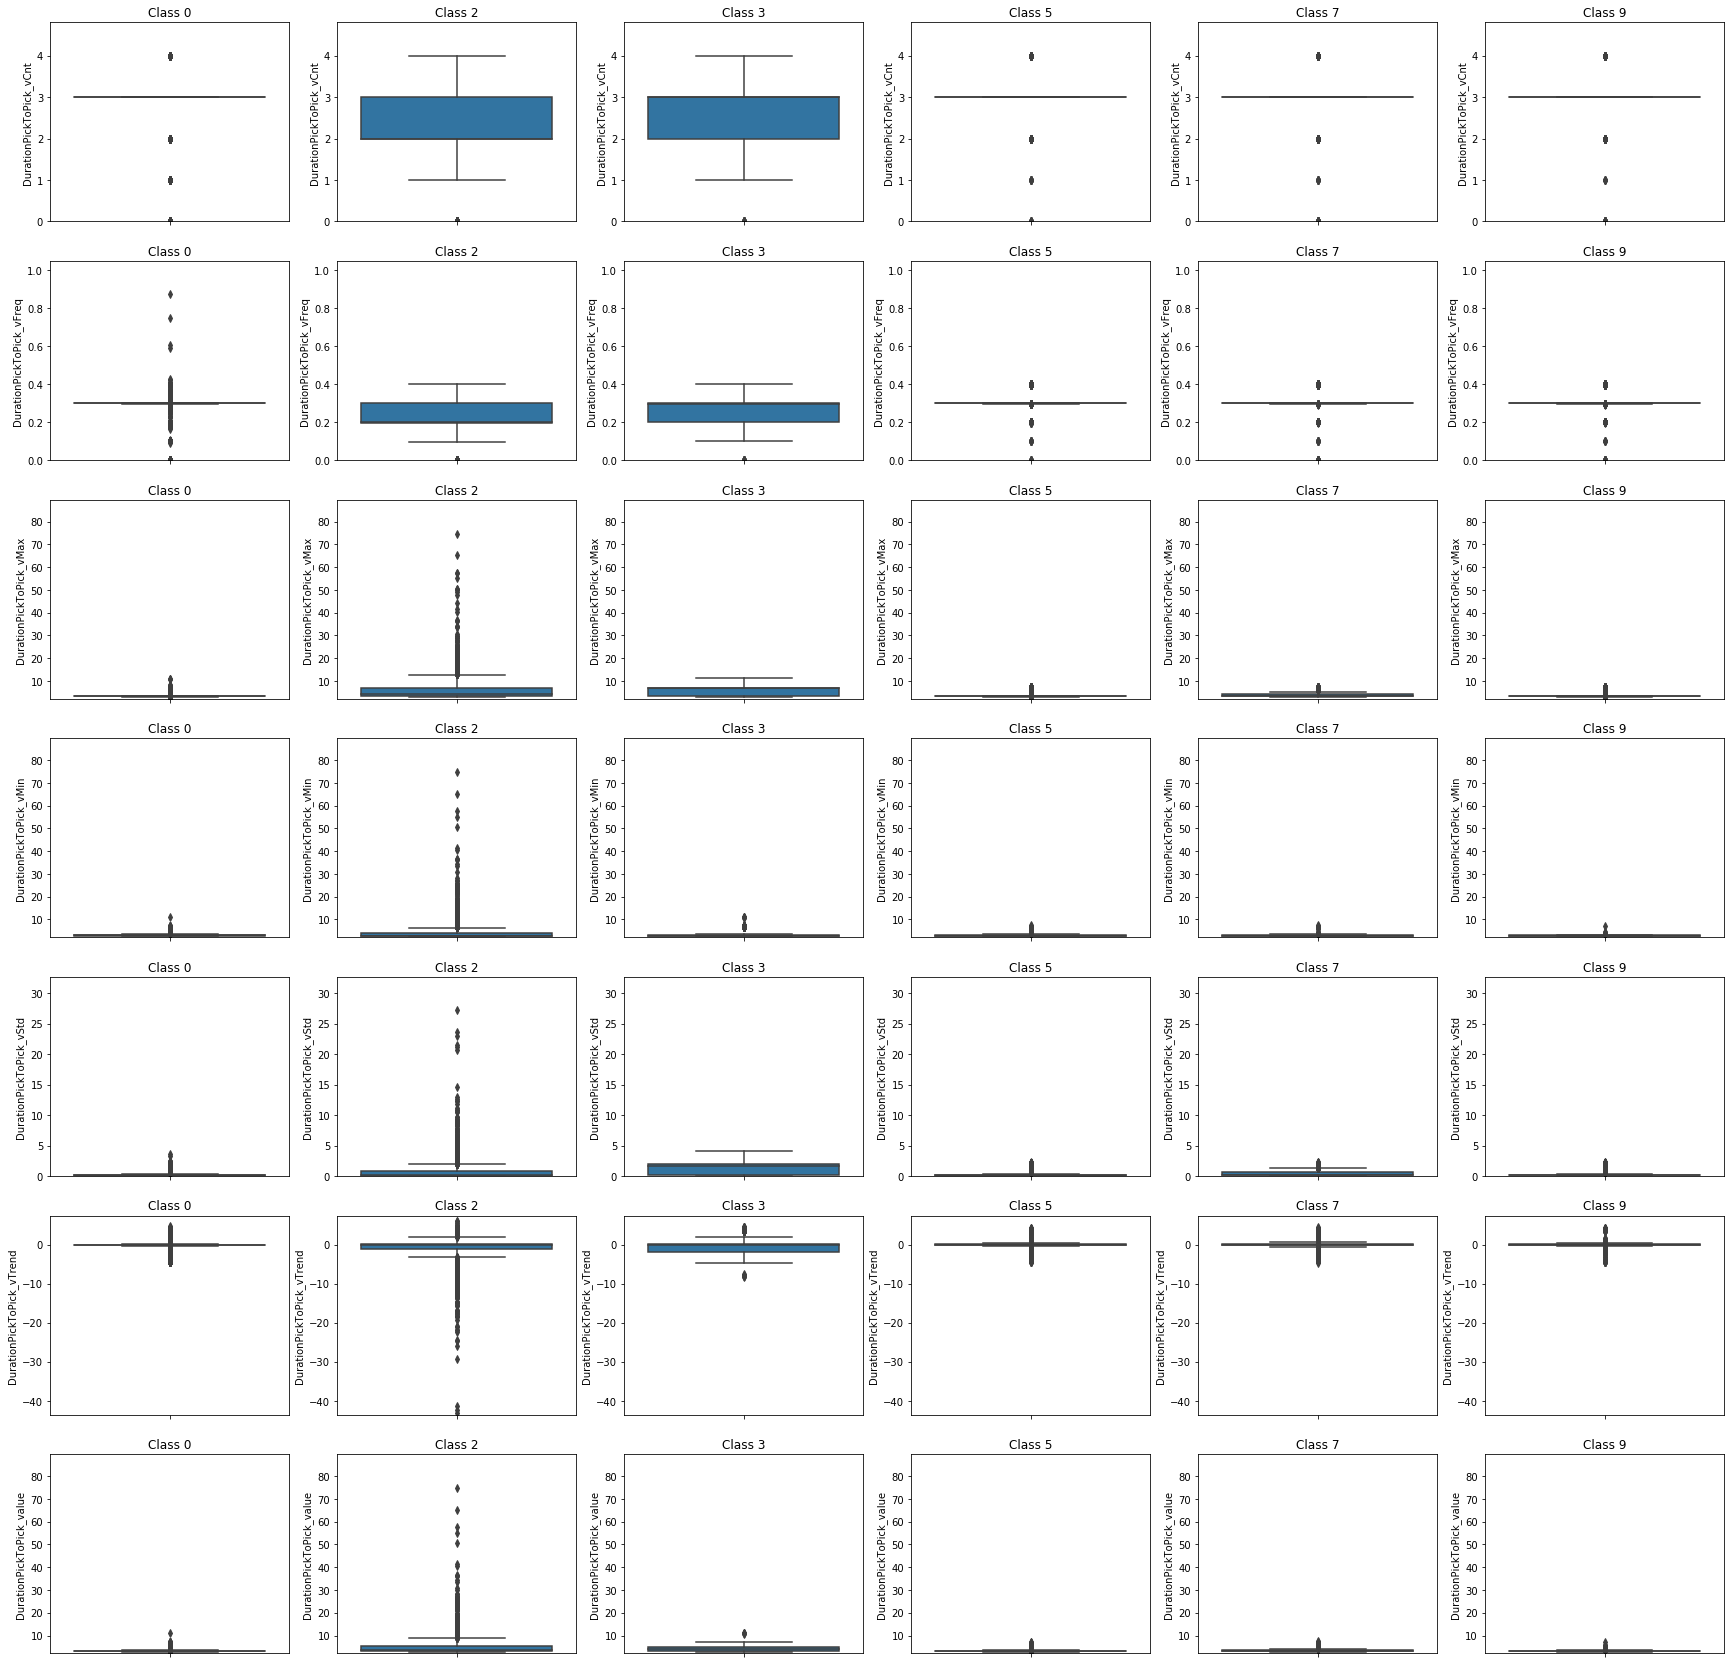

In [9]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [10]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [11]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [12]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [13]:
new_df[new_df['class']==99]

,class,feature,max,min,std,mean,median,Count,NA_count
0,99,DurationPickToPick_vCnt,4.000000,0.000,0.671577,2.977935,3.000000,39611,0
0,99,DurationPickToPick_vFreq,0.873027,0.000,0.066921,0.296384,0.298732,39611,0
0,99,DurationPickToPick_vMax,74.626000,2.729,1.901525,3.930044,3.262000,39177,434
0,99,DurationPickToPick_vMin,74.626000,2.658,1.264191,3.095788,2.973000,39177,434
0,99,DurationPickToPick_vStd,27.217500,0.000,0.717684,0.383875,0.134512,39177,434
0,99,DurationPickToPick_vTrend,6.193000,-54.435,1.389958,-0.155655,-0.006900,38510,1101
0,99,DurationPickToPick_value,74.626000,2.729,1.407078,3.471143,3.167667,39177,434


In [14]:
% skip

missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 11 DurationPickToPick_vTrend 361 [0, 1, 360]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 17 DurationPickToPick_vMax 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 DurationPickToPick_vMin 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 DurationPickToPick_vStd 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 DurationPickToPick_vTrend 362 [0, 1, 313, 361]
0 17 DurationPickToPick_vTrend 362 [0, 1, 313, 361]
NA at start or end
NA at start or end
0 17 DurationPickToPick_value 362 [0, 1, 361]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA 

NA at start or end
0 55 DurationPickToPick_vMax 1078 [0, 1, 2]
0 55 DurationPickToPick_vMax 1078 [0, 1, 2]
NA at start or end
0 55 DurationPickToPick_vMin 1078 [0, 1, 2]
0 55 DurationPickToPick_vMin 1078 [0, 1, 2]
NA at start or end
0 55 DurationPickToPick_vStd 1078 [0, 1, 2]
0 55 DurationPickToPick_vStd 1078 [0, 1, 2]
NA at start or end
0 55 DurationPickToPick_vTrend 1078 [0, 1, 2, 3, 1077]
0 55 DurationPickToPick_vTrend 1078 [0, 1, 2, 3, 1077]
0 55 DurationPickToPick_vTrend 1078 [0, 1, 2, 3, 1077]
NA at start or end
NA at start or end
0 55 DurationPickToPick_value 1078 [0, 1, 2]
0 55 DurationPickToPick_value 1078 [0, 1, 2]
NA at start or end
0 56 DurationPickToPick_vMax 1080 [0, 1, 2, 3, 1079]
0 56 DurationPickToPick_vMax 1080 [0, 1, 2, 3, 1079]
0 56 DurationPickToPick_vMax 1080 [0, 1, 2, 3, 1079]
NA at start or end
NA at start or end
0 56 DurationPickToPick_vMin 1080 [0, 1, 2, 3, 1079]
0 56 DurationPickToPick_vMin 1080 [0, 1, 2, 3, 1079]
0 56 DurationPickToPick_vMin 1080 [0, 1, 2, 3

NA at start or end
0 7 DurationPickToPick_vTrend 361 [0, 1, 360]
NA at start or end
NA at start or end
0 7 DurationPickToPick_value 361 [0, 1]
NA at start or end
0 80 DurationPickToPick_vMax 360 [0, 358, 359]
NA at start or end
NA at start or end
0 80 DurationPickToPick_vMin 360 [0, 358, 359]
NA at start or end
NA at start or end
0 80 DurationPickToPick_vStd 360 [0, 358, 359]
NA at start or end
NA at start or end
0 80 DurationPickToPick_vTrend 360 [0, 345, 358, 359]
0 80 DurationPickToPick_vTrend 360 [0, 345, 358, 359]
NA at start or end
NA at start or end
0 80 DurationPickToPick_value 360 [0, 358, 359]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 8 DurationPickToPick_vTrend 360 [0, 49, 359]
NA at start or end
NA at start or end
NA at start or end
0 9 DurationPickToPick_vMax 362 [0, 1, 361]
NA at start or end
NA at start or end
0 9 DurationPickToPick_vMin 362 [0, 1, 361]
NA at start or end
NA at start or end
0 9 DurationPickToPick_vSt

NA at start or end
2 2 DurationPickToPick_vStd 1079 [0, 1, 2, 117, 118, 224, 247, 249, 250, 251, 420, 466, 468, 522, 532, 565, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 682, 689, 696, 717, 720, 766, 770, 782, 803, 813, 843, 873, 874, 896, 900, 929, 985, 1022, 1054, 1072, 1078]
2 2 DurationPickToPick_vStd 1079 [0, 1, 2, 117, 118, 224, 247, 249, 250, 251, 420, 466, 468, 522, 532, 565, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 682, 689, 696, 717, 720, 766, 770, 782, 803, 813, 843, 873, 874, 896, 900, 929, 985, 1022, 1054, 1072, 1078]
2 2 DurationPickToPick_vStd 1079 [0, 1, 2, 117, 118, 224, 247, 249, 250, 251, 420, 466, 468, 522, 532, 565, 592, 594, 597, 598, 600, 601, 622, 633, 657, 662, 663, 664, 682, 689, 696, 717, 720, 766, 770, 782, 803, 813, 843, 873, 874, 896, 900, 929, 985, 1022, 1054, 1072, 1078]
2 2 DurationPickToPick_vStd 1079 [0, 1, 2, 117, 118, 224, 247, 249, 250, 251, 420, 466, 468, 522, 532, 565, 592, 594, 597, 598, 600, 601, 622, 633, 65

2 2 DurationPickToPick_vTrend 1079 [0, 1, 2, 37, 39, 58, 59, 60, 61, 64, 65, 82, 87, 104, 107, 108, 109, 110, 112, 113, 115, 117, 118, 119, 133, 134, 136, 138, 144, 177, 199, 222, 223, 224, 247, 249, 250, 251, 254, 272, 274, 275, 280, 283, 312, 318, 321, 323, 405, 420, 421, 426, 429, 461, 466, 468, 470, 473, 475, 491, 494, 500, 502, 503, 504, 519, 522, 524, 529, 531, 532, 564, 565, 568, 587, 589, 592, 594, 596, 597, 598, 599, 600, 601, 617, 618, 622, 626, 627, 628, 629, 630, 633, 649, 651, 654, 657, 660, 661, 662, 663, 664, 679, 682, 689, 692, 693, 696, 711, 712, 713, 715, 716, 717, 718, 720, 722, 723, 737, 740, 744, 762, 763, 766, 770, 772, 773, 774, 782, 783, 797, 799, 803, 805, 806, 808, 809, 812, 813, 831, 833, 835, 836, 837, 839, 840, 841, 843, 846, 858, 865, 869, 871, 873, 874, 875, 890, 891, 892, 893, 894, 896, 897, 898, 899, 900, 916, 917, 920, 923, 926, 928, 929, 948, 953, 955, 956, 957, 983, 984, 985, 986, 987, 989, 990, 1010, 1013, 1015, 1017, 1018, 1022, 1023, 1025, 1040, 1

2 3 DurationPickToPick_vMax 1035 [0, 1, 2, 3, 4, 28, 30, 32, 33, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 115, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 174, 177, 178, 179, 182, 184, 188, 190, 195, 196, 199, 203, 211, 212, 214, 215, 216, 217, 219, 222, 223, 224, 225, 359, 360, 367, 370, 373, 374, 376, 378, 402, 404, 409, 415, 417, 450, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 543, 561, 565, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 711, 712, 751, 771, 823, 824, 827, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1012, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 DurationPickToPick_vMax 1035 [0, 1, 2, 3, 4, 28, 30, 32, 33, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 115, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 174, 177, 178, 179, 182, 184, 188, 190, 195, 196, 19

2 3 DurationPickToPick_vMin 1035 [0, 1, 2, 3, 4, 28, 30, 32, 33, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 115, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 174, 177, 178, 179, 182, 184, 188, 190, 195, 196, 199, 203, 211, 212, 214, 215, 216, 217, 219, 222, 223, 224, 225, 359, 360, 367, 370, 373, 374, 376, 378, 402, 404, 409, 415, 417, 450, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 543, 561, 565, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 711, 712, 751, 771, 823, 824, 827, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1012, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 DurationPickToPick_vMin 1035 [0, 1, 2, 3, 4, 28, 30, 32, 33, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 115, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 174, 177, 178, 179, 182, 184, 188, 190, 195, 196, 19

2 3 DurationPickToPick_vStd 1035 [0, 1, 2, 3, 4, 28, 30, 32, 33, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 115, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 174, 177, 178, 179, 182, 184, 188, 190, 195, 196, 199, 203, 211, 212, 214, 215, 216, 217, 219, 222, 223, 224, 225, 359, 360, 367, 370, 373, 374, 376, 378, 402, 404, 409, 415, 417, 450, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 543, 561, 565, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 711, 712, 751, 771, 823, 824, 827, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1012, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 DurationPickToPick_vStd 1035 [0, 1, 2, 3, 4, 28, 30, 32, 33, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 115, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 174, 177, 178, 179, 182, 184, 188, 190, 195, 196, 19

2 3 DurationPickToPick_vTrend 1035 [0, 1, 2, 3, 4, 21, 25, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 78, 109, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 164, 165, 166, 168, 169, 170, 171, 172, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 275, 276, 277, 278, 279, 315, 359, 360, 363, 365, 367, 368, 369, 370, 371, 373, 374, 376, 377, 378, 379, 380, 395, 400, 402, 403, 404, 406, 409, 410, 411, 412, 413, 414, 415, 416, 417, 449, 450, 451, 452, 454, 455, 457, 458, 459, 460, 461, 462, 463, 464, 467, 468, 470, 473, 518, 519, 523, 524, 525, 526, 529, 530, 532, 533, 535, 536, 538, 539, 540, 542, 543, 544, 559, 561, 563, 565, 567, 568, 5

2 3 DurationPickToPick_vTrend 1035 [0, 1, 2, 3, 4, 21, 25, 27, 28, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 78, 109, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 164, 165, 166, 168, 169, 170, 171, 172, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 275, 276, 277, 278, 279, 315, 359, 360, 363, 365, 367, 368, 369, 370, 371, 373, 374, 376, 377, 378, 379, 380, 395, 400, 402, 403, 404, 406, 409, 410, 411, 412, 413, 414, 415, 416, 417, 449, 450, 451, 452, 454, 455, 457, 458, 459, 460, 461, 462, 463, 464, 467, 468, 470, 473, 518, 519, 523, 524, 525, 526, 529, 530, 532, 533, 535, 536, 538, 539, 540, 542, 543, 544, 559, 561, 563, 565, 567, 568, 5

2 3 DurationPickToPick_value 1035 [0, 1, 2, 3, 4, 28, 30, 32, 33, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 115, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 174, 177, 178, 179, 182, 184, 188, 190, 195, 196, 199, 203, 211, 212, 214, 215, 216, 217, 219, 222, 223, 224, 225, 359, 360, 367, 370, 373, 374, 376, 378, 402, 404, 409, 415, 417, 450, 459, 460, 467, 473, 523, 525, 530, 535, 538, 539, 542, 543, 561, 565, 567, 568, 569, 570, 576, 578, 580, 583, 584, 585, 640, 644, 650, 651, 656, 657, 659, 661, 662, 664, 665, 711, 712, 751, 771, 823, 824, 827, 890, 896, 898, 902, 903, 905, 925, 926, 933, 934, 966, 974, 976, 1012, 1015, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
2 3 DurationPickToPick_value 1035 [0, 1, 2, 3, 4, 28, 30, 32, 33, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 58, 59, 60, 61, 63, 64, 65, 66, 72, 73, 74, 75, 77, 115, 119, 120, 121, 123, 125, 126, 130, 169, 170, 171, 172, 174, 177, 178, 179, 182, 184, 188, 190, 195, 196, 

2 4 DurationPickToPick_vTrend 360 [0, 5, 10, 14, 16, 78, 79, 82, 83, 86, 89, 91, 92, 93, 95, 97, 98, 99, 114, 116, 118, 120, 121, 122, 124, 125, 129, 130, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 156, 159, 160, 161, 164, 166, 168, 169, 172, 185, 186, 188, 189, 191, 192, 195, 196, 197, 198, 214, 215, 216, 217, 218, 220, 221, 223, 224, 226, 227, 228, 229, 230, 231, 232, 237, 249, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 264, 280, 281, 283, 284, 285, 287, 288, 291, 293, 294, 296, 297, 332, 335, 343, 344, 346, 348, 349, 350, 352, 356, 359]
2 4 DurationPickToPick_vTrend 360 [0, 5, 10, 14, 16, 78, 79, 82, 83, 86, 89, 91, 92, 93, 95, 97, 98, 99, 114, 116, 118, 120, 121, 122, 124, 125, 129, 130, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 156, 159, 160, 161, 164, 166, 168, 169, 172, 185, 186, 188, 189, 191, 192, 195, 196, 197, 198, 214, 215, 216, 217, 218, 220, 221, 223, 224, 226, 227, 228, 229, 230, 231, 232, 237, 249, 252, 253, 254, 255, 256, 257, 258, 260, 261, 262, 

NA at start or end
3 2 DurationPickToPick_vStd 1079 [0, 1, 2, 3]
3 2 DurationPickToPick_vStd 1079 [0, 1, 2, 3]
3 2 DurationPickToPick_vStd 1079 [0, 1, 2, 3]
NA at start or end
3 2 DurationPickToPick_vTrend 1079 [0, 1, 2, 3, 131, 142, 245, 280, 292, 415, 455, 465, 506, 509, 512, 537, 566, 603, 609, 613, 659, 674, 742, 757, 777, 797, 809, 818, 840, 877, 880, 947, 956, 1014, 1078]
3 2 DurationPickToPick_vTrend 1079 [0, 1, 2, 3, 131, 142, 245, 280, 292, 415, 455, 465, 506, 509, 512, 537, 566, 603, 609, 613, 659, 674, 742, 757, 777, 797, 809, 818, 840, 877, 880, 947, 956, 1014, 1078]
3 2 DurationPickToPick_vTrend 1079 [0, 1, 2, 3, 131, 142, 245, 280, 292, 415, 455, 465, 506, 509, 512, 537, 566, 603, 609, 613, 659, 674, 742, 757, 777, 797, 809, 818, 840, 877, 880, 947, 956, 1014, 1078]
3 2 DurationPickToPick_vTrend 1079 [0, 1, 2, 3, 131, 142, 245, 280, 292, 415, 455, 465, 506, 509, 512, 537, 566, 603, 609, 613, 659, 674, 742, 757, 777, 797, 809, 818, 840, 877, 880, 947, 956, 1014, 1078]
3 2 

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
5 0 DurationPickToPick_vTrend 361 [0, 1, 360]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
5 2 DurationPickToPick_vMax 1078 [0, 1, 2, 3]
5 2 DurationPickToPick_vMax 1078 [0, 1, 2, 3]
5 2 DurationPickToPick_vMax 1078 [0, 1, 2, 3]
NA at start or end
5 2 DurationPickToPick_vMin 1078 [0, 1, 2, 3]
5 2 DurationPickToPick_vMin 1078 [0, 1, 2, 3]
5 2 DurationPickToPick_vMin 1078 [0, 1, 2, 3]
NA at start or end
5 2 DurationPickToPick_vStd 1078 [0, 1, 2, 3]
5 2 DurationPickToPick_vStd 1078 [0, 1, 2, 3]
5 2 DurationPickToPick_vStd 1078 [0, 1, 2, 3]
NA at start or end
5 2 DurationPickToPick_vTrend 1078 [0, 1, 2, 3, 211, 424, 603, 952, 1050, 1077]
5 2 DurationPickToPick_vTrend 1078 [0, 1, 2, 3, 211, 424, 603, 952, 1050, 1077]
5 2 DurationPickToPick_vTrend 1078 [0, 1, 2, 3, 211, 424, 603, 952, 1050, 1077]
5 2 DurationPickToPick_vTrend 1078

NA at start or end
7 5 DurationPickToPick_vTrend 361 [0, 77, 213, 228, 359, 360]
7 5 DurationPickToPick_vTrend 361 [0, 77, 213, 228, 359, 360]
7 5 DurationPickToPick_vTrend 361 [0, 77, 213, 228, 359, 360]
7 5 DurationPickToPick_vTrend 361 [0, 77, 213, 228, 359, 360]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
9 1 DurationPickToPick_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 DurationPickToPick_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 DurationPickToPick_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 DurationPickToPick_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 DurationPickToPick_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 DurationPickToPick_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 DurationPickToPick_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 DurationPickToPick_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
NA at start or end
9 1 DurationPickToPick_vMin 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 DurationPickToPick_vMin 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 DurationPickToPick_vMin 369 [0, 1,